# What is Naive Bayes Classifier ?

Naive Bayes Classifiers are developed with the help  Bayes Theorem.These classifiers assume that the value of a particular feature is independent of the value of any other feature.

p(class∣data)=p(data∣class)∗p(class)/p(data)

where:

- class is a particular class (e.g. diease)
- data is an observation’s data
- p(class∣data) is called the posterior
- p(data|class) is called the likelihood
- p(class) is called the prior
- p(data) is called the marginal probability


# Gaussian Naive Bayes
Gaussian Naive Bayes is used when the features are continuous variables, and it assumes that the features follow a Gaussian distribution

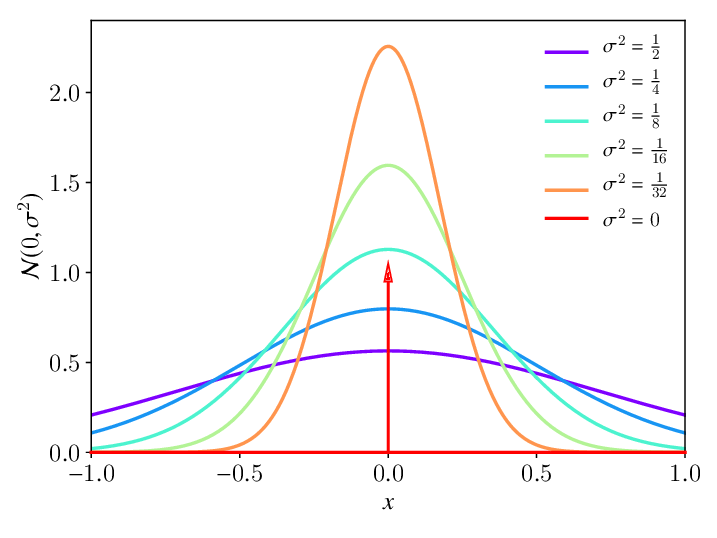


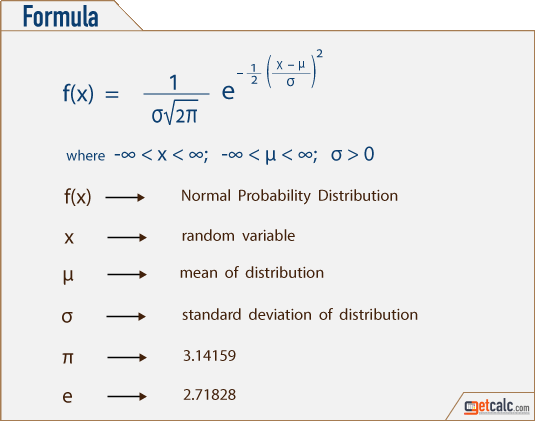

f(x) function will tell probability density of the the x value in the bell graph

A gaussian naive bayes is probably the most popular type of bayes classifier. To explain what the name means, let us look at what the bayes equations looks like when we apply our two classes (male and female) and three feature variables (height, weight, and footsize):

- posterior (male)=P(male)p(height∣male)p(weight∣male)p(foot size∣male)/marginal probability

- posterior (female)=P(female)p(height∣female)p(weight∣female)p(foot size∣female)/marginal probability

Now let us unpack the top equation a bit:

- P(male) is the prior probabilities. It is, as you can see, simply the probability an observation is male. This is just the number of males in the dataset divided by the total number of people in the dataset.

- p(height∣female)p(weight∣female)p(foot size∣female) is the likelihood. Notice that we have unpacked person’s data so it is now every feature in the dataset. The “gaussian” and “naive” come from two assumptions present in this likelihood:

 -   If you look each term in the likelihood you will notice that we assume each feature is uncorrelated from each other. That is, foot size is independent of weight or height etc.. This is obviously not true, and is a “naive” assumption  hence the name “naive bayes.”
 - Second, we assume have that the value of the features (e.g. the height of women, the weight of women) are normally (gaussian) distributed. This means that p(height∣female) is calculated by inputing the required parameters into the probability density function of the normal distribution:

 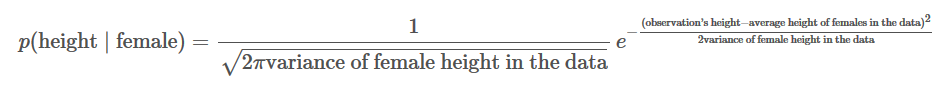

In [43]:
import pandas as pd
import numpy as np

In [44]:
# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


The dataset above is used to construct our classifier. Below we will create a new person for whom we know their feature values but not their gender. Our goal is to predict their gender.

In [45]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data 
person

,Height,Weight,Foot_Size
0,6,130,8


# Calculate Priors
Priors can be either constants or probability distributions. In our example, this is simply the probability of being a gender. Calculating this is simple:

In [46]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()

# Number of males
n_female = data['Gender'][data['Gender'] == 'female'].count()

# Total rows
total_ppl = data['Gender'].count()

# Number of males divided by the total rows
P_male = n_male/total_ppl

# Number of females divided by the total rows
P_female = n_female/total_ppl

This means that for each class (e.g. female) and feature (e.g. height) combination we need to calculate the variance and mean value from the data

In [47]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# View the values
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [48]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [49]:
# Means for male
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# Means for female
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# Variance for female
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

Finally, we need to create a function to calculate the probability density of each of the terms of the likelihood (e.g. p(height∣female)).

In [50]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

# Predict the new data
 Remember that since we can ignore the marginal probability (the demoninator), what we are actually calculating is this:

numerator of the posterior=P(female)p(height∣female)p(weight∣female)p(foot size∣female)

To do this, we just need to plug in the values of the unclassified data (height = 6), the variables of the dataset (e.g. mean of female height), and the function (p_x_given_y) we made above:

In [51]:
# Numerator of the posterior if the unclassified observation is a male
male = P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

print("probability of new data is male",male)

probability of new data is male 6.197071843878078e-09


In [52]:
# Numerator of the posterior if the unclassified observation is a female
female = P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)

print("probability of new data is female",female)

probability of new data is female 0.0005377909183630018


In [53]:
if male > female:
  print("new data is male")
else:
  print("new data is female")

new data is female
